In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import numpy as np
import nolds   ##ref: https://pypi.org/project/nolds/
from entropy import *   ##ref: https://github.com/raphaelvallat/entropy


In [2]:
#import data as dataframe
Data = pd.read_csv('./intern_dataset.csv')

In [3]:
#actual data
Data.head()

,Time,Signal1,Signal2,Label
0,2017-08-14 11:37:49.791,33668.091913,0.856726,A
1,2017-08-14 11:37:49.801,32564.903040,0.856705,A
2,2017-08-14 11:37:49.811,31454.043305,0.856683,A
3,2017-08-14 11:37:49.821,30335.387166,0.856659,A
4,2017-08-14 11:37:49.831,29207.142938,0.856634,A


In [32]:
#check dtypes of data
Data.dtypes

Time        object
Signal1    float64
Signal2    float64
Label       object
dtype: object

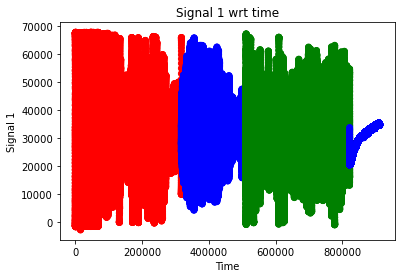

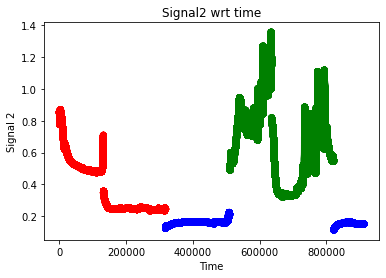

In [34]:
#plotting the signals wrt time
colors = {'A':'red', 'B':'green', 'C':'blue'}
c=Data['Label'].map(colors)
plt.scatter(x=Data.index,y=Data['Signal1'],color=c)
plt.xlabel("Time")
plt.ylabel("Signal 1")
plt.title('Signal 1 wrt time')
plt.show()
#second Plot
plt.scatter(x=Data.index,y=Data['Signal2'],color=c)
plt.title('Signal2 wrt time')
plt.xlabel("Time")
plt.ylabel("Signal 2")
plt.show()

In [37]:
#mean of each category of Label
Data.groupby(['Label'])['Signal1','Signal2'].mean()

<ipython-input-37-b39cc406d851>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Data.groupby(['Label'])['Signal1','Signal2'].std()


,Signal1,Signal2
Label,,
A,14506.810996,0.157220
B,10693.240850,0.238301
C,8864.887863,0.010161


In [38]:
#standard deviation of each category of Label
Data.groupby(['Label'])['Signal1','Signal2'].std()

<ipython-input-38-cf57dd84c125>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Data.groupby(['Label'])['Signal1','Signal2'].std()


,Signal1,Signal2
Label,,
A,14506.810996,0.157220
B,10693.240850,0.238301
C,8864.887863,0.010161


## From here onwards Nomenclature :
### Label:Class
### Class A Signal 1 : cAs1
### Class A Signal 2 : cAs2
### Class B Signal 1 : cBs1
### Class B Signal 2 : cBs2
### Class C Signal 1 : cCs1
### Class C Signal 2 : cCs2

In [125]:
#general overview of data 
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912000 entries, 0 to 911999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Time     912000 non-null  object 
 1   Signal1  912000 non-null  float64
 2   Signal2  912000 non-null  float64
 3   Label    912000 non-null  object 
dtypes: float64(2), object(2)
memory usage: 27.8+ MB


In [109]:
# Look at the counts of classes
Data['Label'].value_counts()

A    318000
B    312000
C    282000
Name: Label, dtype: int64

In [126]:
#subseting dataset into 3 subsets of categories of label
ClassA=Data[Data['Label']=='A']
ClassB=Data[Data['Label']=='B']
ClassC=Data[Data['Label']=='C']


## Hurst exponent analysis 
#### Hurst exponents gives a measure of long-term memory of time series. It relates to the autocorrelations of the time series, and the rate at which these decrease as the lag between pairs of values increases

### H = 0.5 — Brownian motion,
### 0.5 < H < 1.0 — persistent behavior,
### 0 < H < 0.5 — anti-persistent behavior.

### Class A

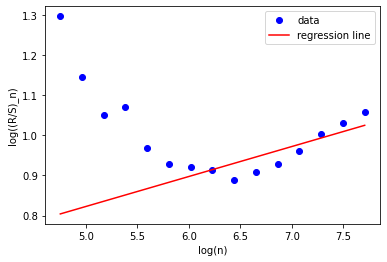

0.5747595732623282

In [26]:
nolds.hurst_rs(ClassA['Signal1'],debug_plot=True)  #cAs1

##### Above Hurst Exponent is above to 0.5. and near 0.5 It's fair to consider this cAs1 to be close to brownian motion and follows slight persistent behavior. Meaning given cAs1 is completely  uncorrelated with sight autocorrelation, this trend will continues. Thus hurst exponent is directly related to dimension of line, we can observe that dimension of cAs1 is 1.425 means it is neither too rough or too smooth, in other words its random fluctuation thats balance with highs and lows.

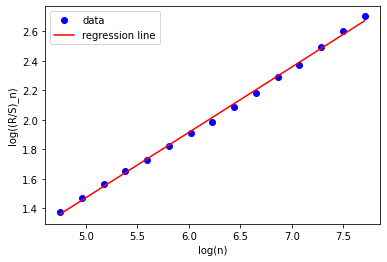

0.9436455006528913

In [30]:
nolds.hurst_rs(ClassA['Signal2'],debug_plot=True)   #cAs2

##### Here Hurst Exponent is also below 1. So this cAs2 follow persistent pattern of cAs1 . Meaning time series with long-term positive autocorrelation, meaning both that a high value in the series will probably be followed by another high value and that the values a long time into the future will also tend to be high.

### Class B

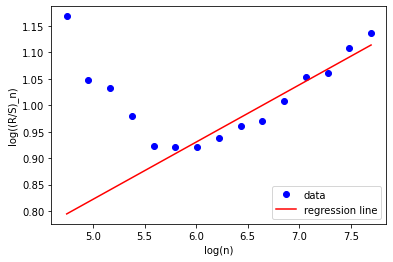

0.6082193903732963

In [31]:
nolds.hurst_rs(ClassB['Signal1'],debug_plot=True)    #cBs1

#### cBs1 Hurst exponent is above 0.5 and close to 0.5. cBs1 is exactly similar to cAs1 in terms of hurst exponent. Therefore, we can see the slight persistent pattern followed in dimension as well. Which denotes the signal is fluctuating slightly autocorrelated.

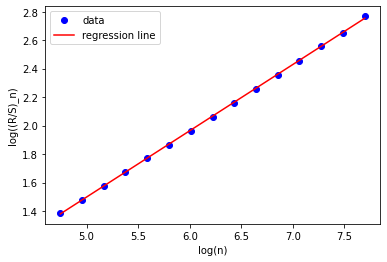

0.9656017582527002

In [32]:
nolds.hurst_rs(ClassB['Signal2'],debug_plot=True)     #cBs2

#### cBs2 has hurst exponent is 0.96 which is under 1. Which tells that signal is hightly persistent .It is also similar to cAs2.

### Class C

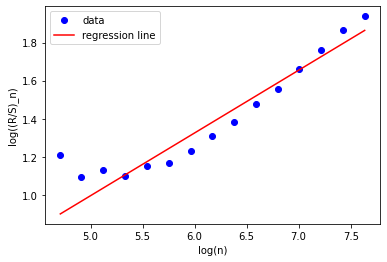

0.8292981622514977

In [33]:
nolds.hurst_rs(ClassC['Signal1'],debug_plot=True)   #cCs1

#### cCs1 hurst exponent is under 0.1. Meaning the signal's trend will be always autocorrelated and persistent.

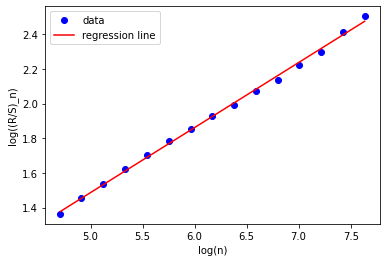

0.8748319171563598

In [34]:
nolds.hurst_rs(ClassC['Signal2'],debug_plot=True)   #cCs2

#### cCs2 hurst exponent is similar to cCs1. And follows similar trends like autocorrelation

### DFA (detrend fluctuation analysis) 
#### DFA is a method for determining the statistical self-affinity of a signal. It is useful for analysing time series that appear to be long-memory processes.
##### alpha <1/2: anti-correlated
##### alpha = 1/2: uncorrelated, white noise
##### alpha >1/2: correlated
##### alpha = 1: 1/f-noise, pink noise
##### alpha >1: non-stationary, unbounded
##### alpha = 3/2: Brownian noise

### Class A

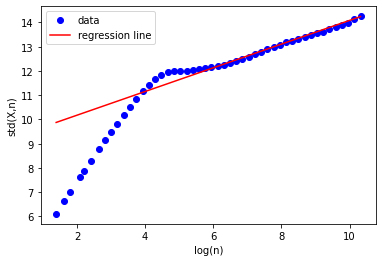

0.48872211784113606

In [99]:
nolds.dfa(data=ClassA['Signal1'],debug_plot=True)   #cAs1

#### DFA of cAs1 's alpha is just under 0.5 meaning its uncorrelated and resembles white noise . thus value is under 1 meaning signal was successfully detrended.

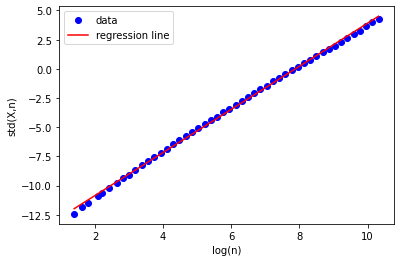

1.8449455786234312

In [35]:
nolds.dfa(data=ClassA['Signal2'],debug_plot=True)     #cAs2

#### cAs2 is 1.8 which denotes it was not able to detrend and signal is unbounded or non-stationary

### Class B

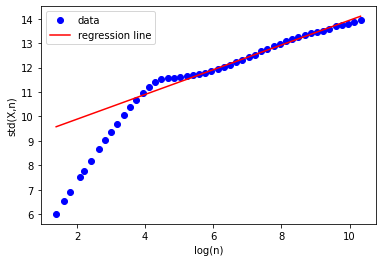

0.5063292014415779

In [37]:
nolds.dfa(data=ClassB['Signal1'],debug_plot=True)    #cBs1

#### cBs1 is 0.5 meaning follows uncorrelated pattern and resembles white noise

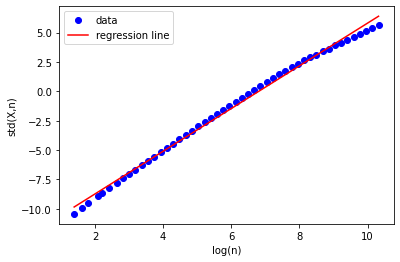

1.817671427084879

In [36]:
nolds.dfa(data=ClassB['Signal2'],debug_plot=True)      #cBs2

#### cBs2 is exact similar to cAs2 and wasnt detrended successfully.

### Class C

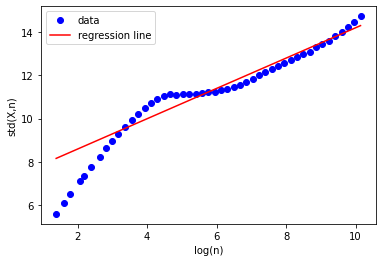

0.7009700485193497

In [39]:
nolds.dfa(data=ClassC['Signal1'],debug_plot=True)   #cCs1

#### cCs1 is greater than 0.5 and thus follow a persistent correlated pattern.

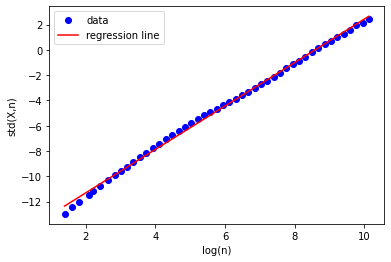

1.7160380861830362

In [38]:
nolds.dfa(data=ClassC['Signal2'],debug_plot=True)      #cCs2

#### cCs2 is  greater than 1 thus wasn't able to detrended well.

## Lyapunov exponent 
#### Lyapunov characteristic exponent of a dynamical system is a quantity that characterizes the rate of separation of infinitesimally close trajectories. It is common to refer to the largest one as the Maximal Lyapunov exponent (MLE), because it determines a notion of predictability for a dynamical system

### Class A

In [9]:
nolds.lyap_r(ClassA['Signal1'][:10000])   #cAs1

C:\Users\rushi\anaconda3\lib\site-packages\nolds\measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


0.026782475858121494

##### The signal cAs1 is flow and the trajectory wont quickly converge to a single point

In [8]:
nolds.lyap_r(ClassA['Signal2'][:10000])     #cAs2

C:\Users\rushi\anaconda3\lib\site-packages\nolds\measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
C:\Users\rushi\anaconda3\lib\site-packages\nolds\measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 552
  warnings.warn(msg.format(lag), RuntimeWarning)


8.140650010640158e-05

##### Signal cAs2 trajectory will quickly converge to a single point. Meaning the signal will reach critical stituation very quickly.

### Class B

In [10]:
nolds.lyap_r(ClassB['Signal1'][:10000])    #cBs1

C:\Users\rushi\anaconda3\lib\site-packages\nolds\measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
C:\Users\rushi\anaconda3\lib\site-packages\nolds\measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 552
  warnings.warn(msg.format(lag), RuntimeWarning)


0.03072954479016766

##### The signal cBs1 is most likely a flow and the trajectory wont quickly converge to a single point

In [11]:
nolds.lyap_r(ClassB['Signal2'][:10000])       #cBs2

C:\Users\rushi\anaconda3\lib\site-packages\nolds\measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
C:\Users\rushi\anaconda3\lib\site-packages\nolds\measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 552
  warnings.warn(msg.format(lag), RuntimeWarning)


-3.374199290855149e-05

##### Signal cBs2 is dissipative, the sum of Lyapunov exponents is negative. Meaning the signal is oscillating far from equilibrium.

### Class C

In [12]:
nolds.lyap_r(ClassC['Signal1'][:10000])    #cCs1

C:\Users\rushi\anaconda3\lib\site-packages\nolds\measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
C:\Users\rushi\anaconda3\lib\site-packages\nolds\measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 552
  warnings.warn(msg.format(lag), RuntimeWarning)


0.06019793357048849

##### The signal cCs1 is likely a  flow and the trajectory wont quickly converge to a single point

In [13]:
nolds.lyap_r(ClassC['Signal2'][:10000])     #cCs2

C:\Users\rushi\anaconda3\lib\site-packages\nolds\measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
C:\Users\rushi\anaconda3\lib\site-packages\nolds\measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 552
  warnings.warn(msg.format(lag), RuntimeWarning)


0.0002488513569255617

##### The signal cCs2 is a flow and the trajectory does not converge to a single point

# Sample entropy
#### Sample entropy (SampEn) is a modification of approximate entropy (ApEn), used for assessing the complexity of physiological time-series signals, diagnosing diseased states. SampEn has two advantages over ApEn: data length independence and a relatively trouble-free implementation

### Class A

In [95]:
nolds.sampen(ClassA['Signal1'][:50000])   #cAs1

0.16448871352996633

In [53]:
nolds.sampen(ClassA['Signal2'][:5000])     #cAs2

0.006400269980705339

### Class B

In [54]:
nolds.sampen(ClassB['Signal1'][:5000])     #cBs1

0.15972189184502253

In [55]:
nolds.sampen(ClassB['Signal2'][:5000])        #cBs2

0.005320922977929178

### Class C

In [56]:
nolds.sampen(ClassC['Signal1'][:5000])    #cCs1

0.21795210552095978

In [57]:
nolds.sampen(ClassC['Signal2'][:5000])     #cCs2

0.0062048831231933665

From above complexity measures we can see that larger the data better the results of complexity . 
With small sample size the complexity tends to be similar with each other. Passing large data to compute also requires high computational power and time. Due to lack of computational resources I have passed only top 5000 values to generate complexity of classes.

### Complexity ranking on limited data points 
#### Class C -> Class A -> Class B
##### assumming the complexity generated represents entire class complexity, we can determine class c is most complex followed with class A and class B

  # Katz fractal dimension

### Class A

In [66]:
katz_fd(ClassA['Signal1'])        #cAs1      # Katz fractal dimension

3.4139001750107423

In [67]:
katz_fd(ClassA['Signal2'])        #cAs2      # Katz fractal dimension

1.1241749063153963

### Class B

In [68]:
katz_fd(ClassB['Signal1'])       #cBs1        # Katz fractal dimension

3.087957152732185

In [69]:
katz_fd(ClassB['Signal2'])      #cBs2        # Katz fractal dimension

1.3198216840536543

### Class C

In [70]:
katz_fd(ClassC['Signal1'])      #cCs1        # Katz fractal dimension

2.8661331404575896

In [71]:
katz_fd(ClassC['Signal2'])       #cCs2         # Katz fractal dimension

1.2555800741222392

# Higuchi fractal dimension

### Class A

In [92]:
higuchi_fd(ClassA['Signal1'], kmax=1000) #cAs1

1.9238079535502934

In [84]:
higuchi_fd(ClassA['Signal2'], kmax=1000)   #cAs2

1.148911242388408

### Class B

In [85]:
higuchi_fd(ClassB['Signal1'], kmax=1000)    #cBs1

1.9373241296017492

In [86]:
higuchi_fd(ClassB['Signal2'], kmax=1000)    #cBs2

1.108193779300374

### Class C

In [93]:
higuchi_fd(ClassC['Signal1'], kmax=1000)    #cCs1 

1.9208989347510277

In [88]:
higuchi_fd(ClassC['Signal2'], kmax=1000)     #cCs2

1.3682272198525944

##### Fractal Dimensions computed with various method will more or less inaccurate if the data set isnt described. As not all fractal dimensions are wrong or correct its only some of them represent dimension properly if suited data is provided.

In [102]:
columns=['Fractal Method','Class/Label','Signal','Dimension']
fractal_summary = pd.DataFrame(columns=columns)

In [106]:
#hurst_method
fractal_summary = fractal_summary.append(dict(zip(fractal_summary.columns,['Hurst Exponent','A','1',0.57])),ignore_index=True)
fractal_summary = fractal_summary.append(dict(zip(fractal_summary.columns,['Hurst Exponent','A','2',0.94])),ignore_index=True)
fractal_summary = fractal_summary.append(dict(zip(fractal_summary.columns,['Hurst Exponent','B','1',0.60])),ignore_index=True)
fractal_summary = fractal_summary.append(dict(zip(fractal_summary.columns,['Hurst Exponent','B','2',0.96])),ignore_index=True)
fractal_summary = fractal_summary.append(dict(zip(fractal_summary.columns,['Hurst Exponent','C','1',0.82])),ignore_index=True)
fractal_summary = fractal_summary.append(dict(zip(fractal_summary.columns,['Hurst Exponent','C','2',0.87])),ignore_index=True)

In [108]:
# as we know D = 2 - H , so computing dimension for Hurst exponent method
fractal_summary['Dimension'] = 2-fractal_summary['Dimension']


In [113]:
#Katz_method
fractal_summary = fractal_summary.append(dict(zip(fractal_summary.columns,['Katz Fractal','A','1',3.41])),ignore_index=True)
fractal_summary = fractal_summary.append(dict(zip(fractal_summary.columns,['Katz Fractal','A','2',1.12])),ignore_index=True)
fractal_summary = fractal_summary.append(dict(zip(fractal_summary.columns,['Katz Fractal','B','1',3.08])),ignore_index=True)
fractal_summary = fractal_summary.append(dict(zip(fractal_summary.columns,['Katz Fractal','B','2',1.31])),ignore_index=True)
fractal_summary = fractal_summary.append(dict(zip(fractal_summary.columns,['Katz Fractal','C','1',2.86])),ignore_index=True)
fractal_summary = fractal_summary.append(dict(zip(fractal_summary.columns,['Katz Fractal','C','2',1.25])),ignore_index=True)

In [115]:
#Higuchi fractal method
fractal_summary = fractal_summary.append(dict(zip(fractal_summary.columns,['Higuchi  Fractal','A','1',1.92])),ignore_index=True)
fractal_summary = fractal_summary.append(dict(zip(fractal_summary.columns,['Higuchi  Fractal','A','2',1.14])),ignore_index=True)
fractal_summary = fractal_summary.append(dict(zip(fractal_summary.columns,['Higuchi  Fractal','B','1',1.93])),ignore_index=True)
fractal_summary = fractal_summary.append(dict(zip(fractal_summary.columns,['Higuchi  Fractal','B','2',1.10])),ignore_index=True)
fractal_summary = fractal_summary.append(dict(zip(fractal_summary.columns,['Higuchi  Fractal','C','1',1.92])),ignore_index=True)
fractal_summary = fractal_summary.append(dict(zip(fractal_summary.columns,['Higuchi  Fractal','C','2',1.36])),ignore_index=True)

In [116]:
fractal_summary

,Fractal Method,Class/Label,Signal,Dimension
0,Hurst Exponent,A,1,1.43
1,Hurst Exponent,A,2,1.06
2,Hurst Exponent,B,1,1.40
3,Hurst Exponent,B,2,1.04
4,Hurst Exponent,C,1,1.18
5,Hurst Exponent,C,2,1.13
6,Katz Fractal,A,1,3.41
7,Katz Fractal,A,2,1.12
8,Katz Fractal,B,1,3.08
9,Katz Fractal,B,2,1.31


In [119]:
fractal_summary.groupby('Class/Label').sum()

,Dimension
Class/Label,
A,10.08
B,9.86
C,9.70


### Fractal Dimenison Ranking Based on label
#### A - > B-> C

In [121]:
fractal_summary.groupby('Signal').sum()

,Dimension
Signal,
1,19.13
2,10.51


### Fractal Dimenison Ranking Based on signal
#### 1->2

### Reference :
https://en.wikipedia.org/wiki/Fractal_dimension#Estimating_from_real-world_data

https://www.researchgate.net/publication/303690278_Application_of_Higuchi's_fractal_dimension_from_basic_to_clinical_neurophysiology_A_review

https://www.intechopen.com/books/fractal-analysis-selected-examples/fractal-analysis-for-time-series-datasets-a-case-study-of-groundwater-quality

http://systems-sciences.uni-graz.at/etextbook/sw2/lyapunov.html

https://www.kaggle.com/prkhrr/fractal-analysis-streching-my-skillls

https://www.pnas.org/content/99/suppl_1/2466

https://www.hindawi.com/journals/cmmm/2012/461426/

https://www.hindawi.com/journals/ddns/2011/724697/